In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\pkgam\Desktop\Basic ML\ML Model\height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

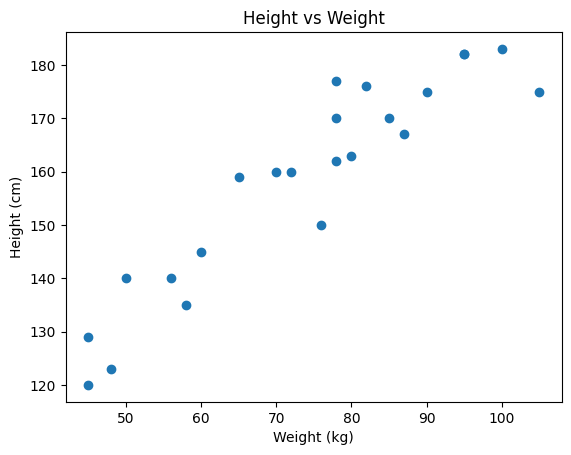

In [4]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs Weight')

### Divide into dependant and independant features

In [10]:
x = df[['Weight']] # independent variable
y = df['Height'] # dependent variable

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x.shape

(23, 1)

In [13]:
x_train.shape, x_test.shape

((18, 1), (5, 1))

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
## we use fit_transform on training data and transform on test data because we want to apply the same scaling to both datasets ,
#  ensuring that the model generalizes well to unseen data.

In [16]:
x_train , x_test

(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]))

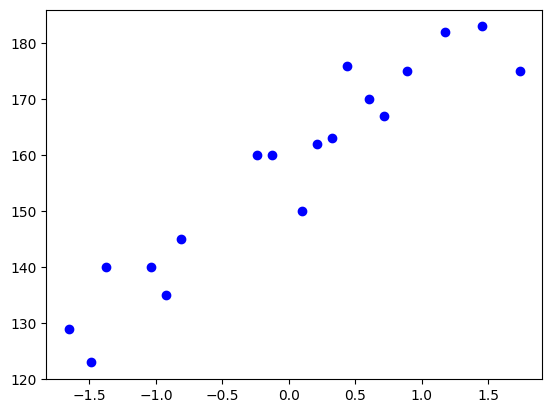

In [17]:
plt.scatter(x_train, y_train, color='blue') 

### Train the model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
print("the slope of model:", model.coef_, "the intercept of model:", model.intercept_)


the slope of model: [17.03440872] the intercept of model: 157.5


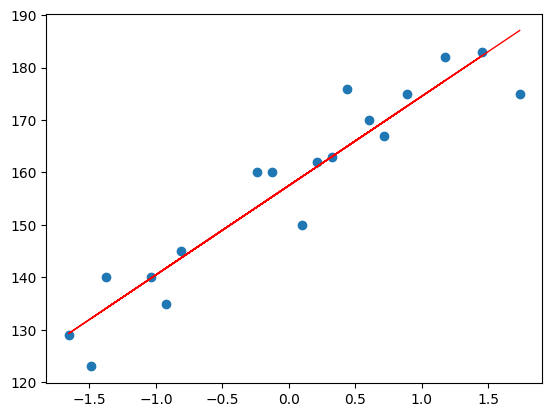

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red', linewidth=1)

### Prediction of train data
height = intercept + coef(weight)      
y_pred_train = 157.5 + 17.03(weight)

### Prediction of test data
height = intercept + coef(weight)       
y_pred_test = 157.5 + 17.03(weight)

In [26]:
y_pred_test = model.predict(x_test)

In [27]:
y_pred_test  , y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

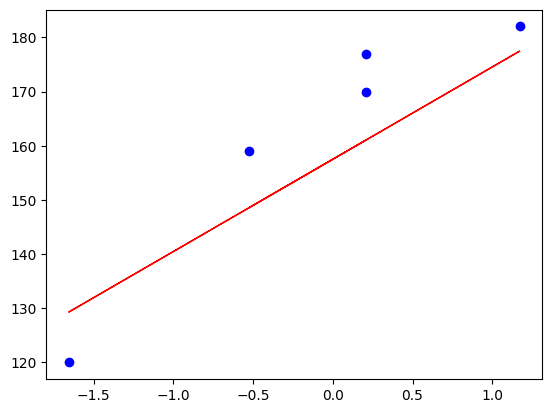

In [28]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred_test, color='red', linewidth=1)

### cost functions

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, y_pred_test)  
print("R^2 Score:", r2)


Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
R^2 Score: 0.776986986042344


### Assumptions

Text(0, 0.5, 'Predicted Height (cm)')

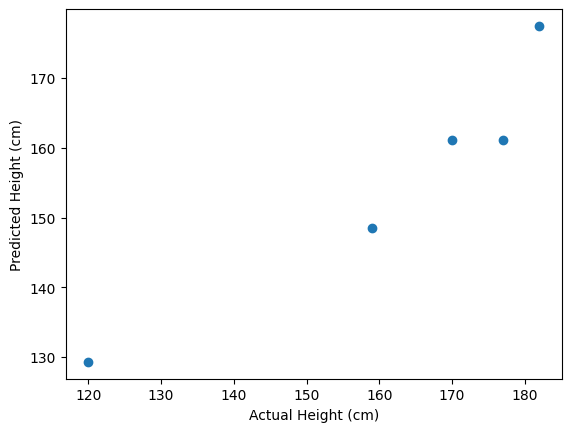

In [32]:
## Predicted data is uniformly distributed around the actual data, indicating that the model is performing well.
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Height (cm)')
plt.ylabel('Predicted Height (cm)')

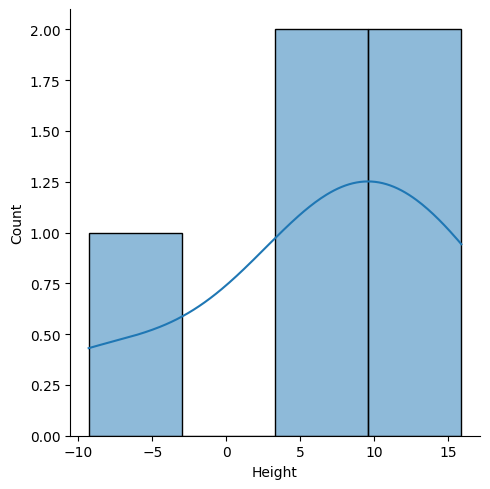

In [37]:
resdiduals = y_test - y_pred_test
sns.displot(resdiduals, kde = True )